In [1]:
import sys
sys.path.insert(0,"..")
from farkas import benchmarks as bm
from farkas.model import DTMC, MDP, ReachabilityForm
from farkas.problem import QSHeur, MILPExact, InverseReachabilityInitializer, InverseFrequencyInitializer
import matplotlib.pyplot as plt

# Crowds-2-8

In [2]:
M = DTMC.from_prism_model("datasets/crowds.pm",
                          prism_constants={("TotalRuns", 8), ("CrowdSize", 2)},
                          extra_labels={("target","observe0>1")})
rf = ReachabilityForm(M, "init", "target")

## Standard Initializer

In [3]:
qsheur_min = QSHeur("min",iterations=5,solver="gurobi")
qsheur_max = QSHeur("max",iterations=5,solver="gurobi")
data_min, data_max = bm.run(rf, [qsheur_min, qsheur_max], from_thr=0.01, to_thr=0.5, step=0.01, debug=False)

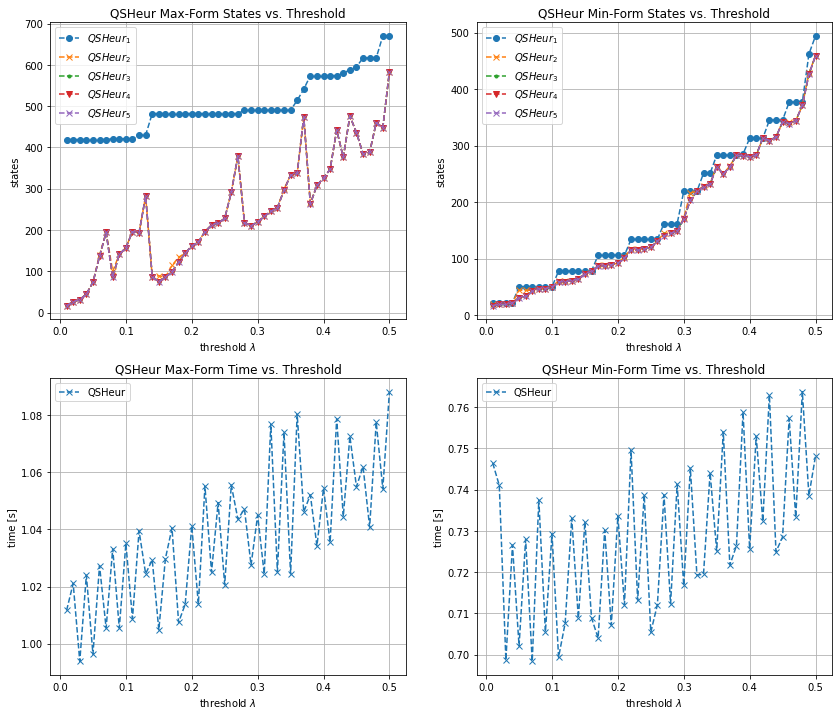

In [4]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(14,12))
bm.render(data_max, mode="states-thr", ax=ax1, title="QSHeur Max-Form States vs. Threshold")
bm.render(data_min, mode="states-thr", ax=ax2, title="QSHeur Min-Form States vs. Threshold")
bm.render(data_max, mode="time-thr", ax=ax3, title="QSHeur Max-Form Time vs. Threshold")
bm.render(data_min, mode="time-thr", ax=ax4, title="QSHeur Min-Form Time vs. Threshold")

## Inverse Reachability Initializer

In [5]:
qsheur_min = QSHeur("min",iterations=5,initializertype=InverseReachabilityInitializer, solver="gurobi")
qsheur_max = QSHeur("max",iterations=5,initializertype=InverseReachabilityInitializer, solver="gurobi")
data_min, data_max = bm.run(rf, [qsheur_min, qsheur_max], from_thr=0.01, to_thr=0.5, step=0.01, debug=False)

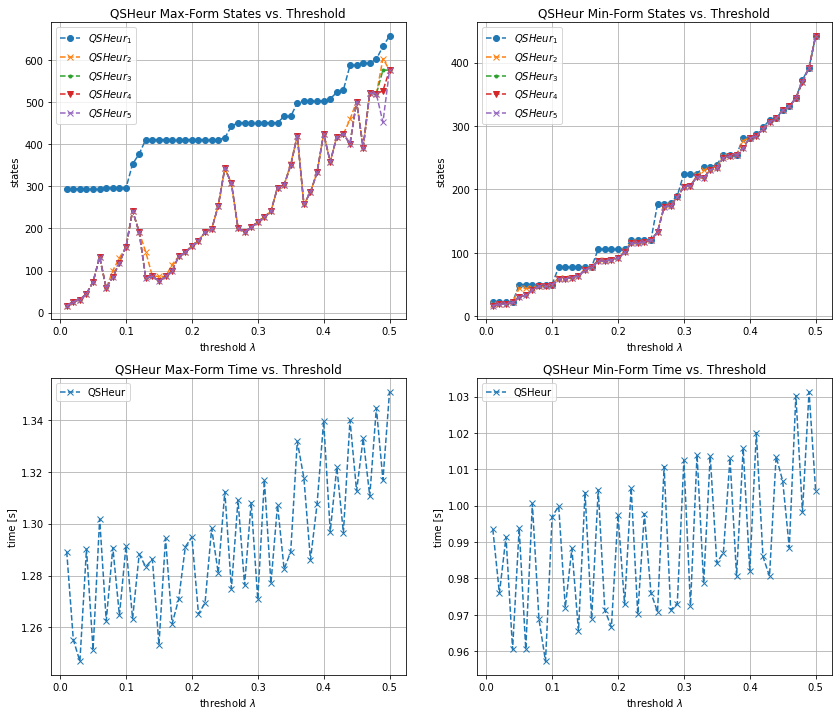

In [6]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(14,12))
bm.render(data_max, mode="states-thr", ax=ax1, title="QSHeur Max-Form States vs. Threshold")
bm.render(data_min, mode="states-thr", ax=ax2, title="QSHeur Min-Form States vs. Threshold")
bm.render(data_max, mode="time-thr", ax=ax3, title="QSHeur Max-Form Time vs. Threshold")
bm.render(data_min, mode="time-thr", ax=ax4, title="QSHeur Min-Form Time vs. Threshold")

## Inverse Expected Frequency Initializer

In [7]:
qsheur_min = QSHeur("min",iterations=5,initializertype=InverseFrequencyInitializer, solver="gurobi")
qsheur_max = QSHeur("max",iterations=5,initializertype=InverseFrequencyInitializer, solver="gurobi")
data_min, data_max = bm.run(rf, [qsheur_min, qsheur_max], from_thr=0.01, to_thr=0.5, step=0.01, debug=False)

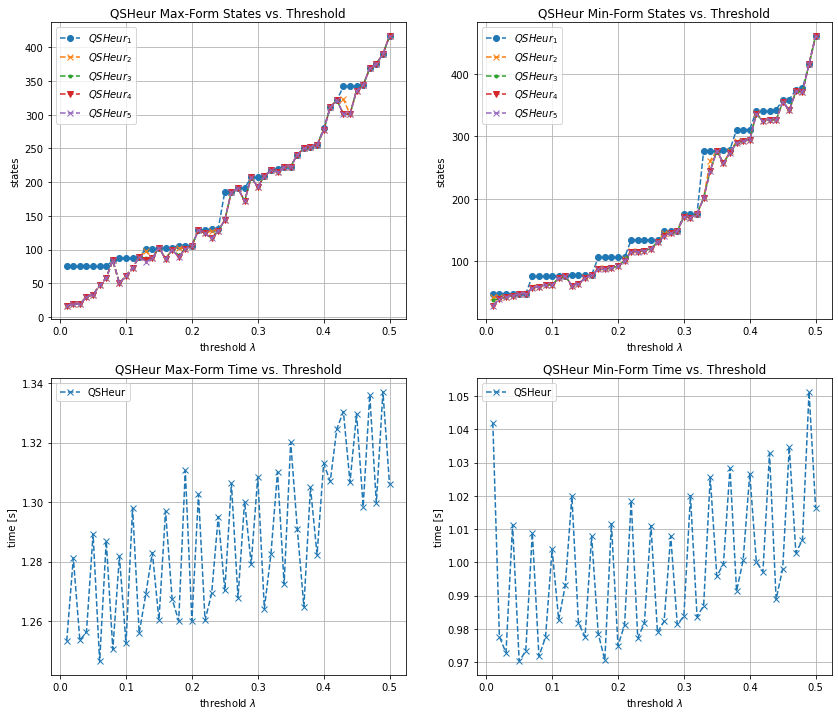

In [8]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(14,12))
bm.render(data_max, mode="states-thr", ax=ax1, title="QSHeur Max-Form States vs. Threshold")
bm.render(data_min, mode="states-thr", ax=ax2, title="QSHeur Min-Form States vs. Threshold")
bm.render(data_max, mode="time-thr", ax=ax3, title="QSHeur Max-Form Time vs. Threshold")
bm.render(data_min, mode="time-thr", ax=ax4, title="QSHeur Min-Form Time vs. Threshold")

# Consensus-2-4

In [9]:
M = MDP.from_file("datasets/consensus-2-4.lab", "datasets/consensus-2-4.tra")
rf = ReachabilityForm(M, "init", "finished")

In [10]:
qsheur_min = QSHeur("min",iterations=2,solver="gurobi")
qsheur_max = QSHeur("max",iterations=2,solver="gurobi")
milpexact_min = MILPExact("min", solver="gurobi")
methods = [qsheur_min, qsheur_max, milpexact_min]
results = bm.run(rf, methods, from_thr=0.1, to_thr=1, step=0.1, debug=False)
data_qsmin, data_qsmax, data_milpmin = results

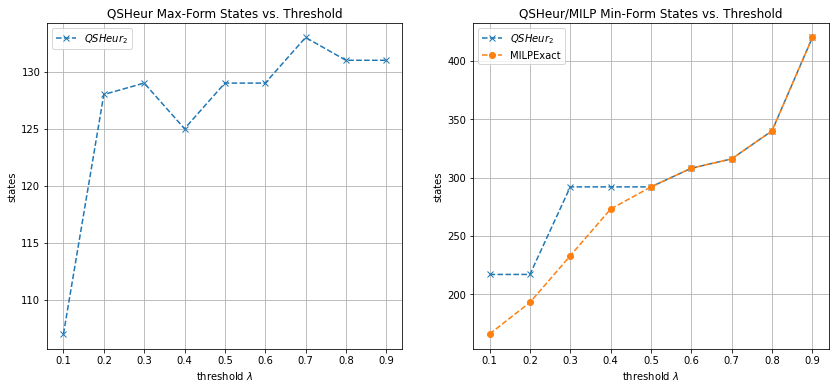

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
bm.render(data_qsmax, mode="laststates-thr", ax=ax1, title="QSHeur Max-Form States vs. Threshold")
bm.render(data_qsmin, mode="laststates-thr", ax=ax2, title="QSHeur/MILP Min-Form States vs. Threshold")
bm.render(data_milpmin, mode="laststates-thr", ax=ax2)

# CSMA-3-2

In [12]:
M = MDP.from_file("datasets/csma-3-2.lab", "datasets/csma-3-2.tra")
rf = ReachabilityForm(M, "init", "all_delivered")

In [13]:
qsheur_min = QSHeur("min",iterations=2,solver="gurobi")
qsheur_max = QSHeur("max",iterations=2,solver="gurobi")
methods = [qsheur_min, qsheur_max]
results = bm.run(rf, methods, from_thr=0.1, to_thr=1, step=0.1, debug=False)
data_qsmin, data_qsmax = results

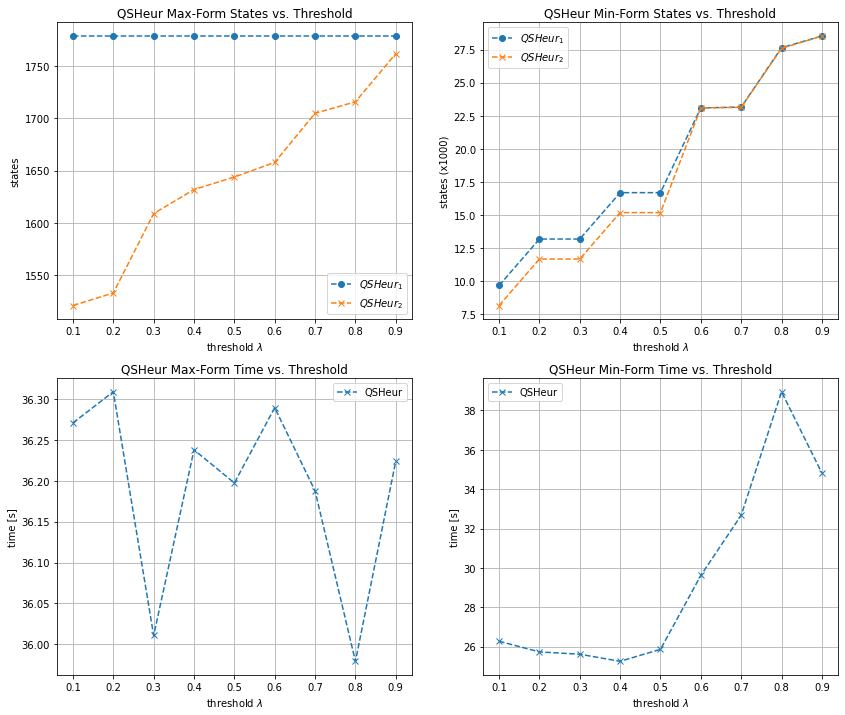

In [14]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize=(14,12))
bm.render(data_qsmax, mode="states-thr", ax=ax1, title="QSHeur Max-Form States vs. Threshold")
bm.render(data_qsmin, mode="states-thr", ax=ax2, title="QSHeur Min-Form States vs. Threshold")
bm.render(data_qsmax, mode="time-thr", ax=ax3, title="QSHeur Max-Form Time vs. Threshold")
bm.render(data_qsmin, mode="time-thr", ax=ax4, title="QSHeur Min-Form Time vs. Threshold")